In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import requests
import time
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sys.path.append(os.path.abspath("C:/Users/calvotello/Dropbox/MTB/Göttingen/research/"))


In [3]:
from librarian_robot import downloading_datasets, map_classications_systems, tokenize, extract_data_from_df, visualize, statistical_tests



# Read Data

In [4]:
df = pd.read_parquet("./../data/exemplars.parquet")

In [5]:
df

ppn medium                               title  \
ppn                                                                 
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
1642067407  1642067407    Aau                               Camus   
1734538619  1734538619    Abv                    1 2 3..! Lecture   
...                ...    ...                                 ...   
800133854    800133854    Aau                   Die @kleine Bijou   
800133854    800133854    Aau                   Die @kleine Bijou   
800133250    800133250    Aau                       Bandera negra   
800132432    800132432    Aau          Contra a morte das linguas   
800132432    800132432    Aau          Contra a morte das linguas   

                                          title_supplement  year  \
ppn                                                                
309277221                                            roman  1991   
309277221                                            roman  1991   
309277221                                            roman  1991   
1642067407                                            None  1987   
1734538619                                            None  1982   
...                                                    ...   ...   
800133854                                            Roman  2014   
800133854                                            Roman  2014   
800133250   novell̃a basada en el setge de Cardona de 1711  2014   
800132432                                 o caso do galego  2014   
800132432                                 o caso do galego  2014   

                entry_first author_first_name  author_last_name author_gnd_id  \
ppn                                                                             
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
1642067407  HDBSRO:13-09-18            Morvan          Lebesque     077112679   
1734538619    2004:02-10-20              None              None          None   
...                     ...               ...               ...           ...   
800133854     KALB:12-11-14           Patrick           Modiano     079561578   
800133854     KALB:12-11-14           Patrick           Modiano     079561578   
800133250     0018:06-11-14             Jordi      Santasusagna     812948734   
800132432     0018:06-11-14            Miguel  Moreira Barbeito          None   
800132432     0018:06-11-14            Miguel  Moreira Barbeito          None   

           editor_first_name  ... GOK_ppn GOK_notation GOK_j  \
ppn                           ...                              
309277221               None  ...    None         None  None   
309277221               None  ...    None         None  None   
309277221               None  ...    None         None  None   
1642067407              None  ...    None         None  None   
1734538619              None  ...    None         None  None   
...                      ...  ...     ...          ...   ...   
800133854              Peter  ...    None         None  None   
800133854              Peter  ...    None         None  None   
800133250               None  ...    None         None  None   
800132432               None  ...    None         None  None   
800132432               None  ...    None         None  None   

                           signatur_place  \
ppn                                         
309277221   MAG|Ha 18-RVK|Ha 18-20|MB 480   
309277221   MAG|Ha 18-RVK|Ha 18-20|MB 480   
309277221   MAG|Ha 18-RVK|Ha 18-20|MB 480   
1642067407                           None   
1734538619                           None   
...                               

In [6]:
", ".join(df.columns.tolist())


'ppn, medium, title, title_supplement, year, entry_first, author_first_name, author_last_name, author_gnd_id, editor_first_name, editor_last_name, editor_gnd_id, isbn, ILNs, content_type, publisher, language_text, language_original, pages, format, comment_isbn, place_publication, summary, title_continuing_resource, work_ppn, work_info, work_title, expression_ppn, expression_info, expression_title, DDC_notation, DDC_sachgruppe, DDC_grundnotation, BK_ppn, BK_notation, BK_j, RVK_ppn, RVK_notation, RVK_j, RVK_k, keyword_RSWK, keyword_K10plus, keyword_project, keyword_local, keyword_045D, keyword_LoC, lcc_notation, klassifikationssystem_system, klassifikationssystem_notation, uri_description, uri, GOK_ppn, GOK_notation, GOK_j, signatur_place, signatur, signatur_date, Abrufzeichen, query, year_publication, ILNs_libraries'

In [7]:
df.shape

(1094658, 61)

# Price

## Extract Price

In [7]:
round(df["comment_isbn"].notna().sum() / df.shape[0], 2)*100

32.0

In [8]:
df["comment_isbn"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                              745655
 : 20.00 EUR                                                                                                                                                                                                                                                                                                                                       2881
 : 18.00 EUR                                                                                                                                                                                                                                                                                                            

In [9]:
df = extract_data_from_df.extract_currencies(df, "comment_isbn")

no_currency
	- Converted into float successfully!
EUR
	- Converted into float successfully!
DM
	- Converted into float successfully!
M
	- Converted into float successfully!
CHF
	- Converted into float successfully!
円
	- Convertion into float failed.
USD
	- Converted into float successfully!
sfr
	- Converted into float successfully!
S
	- Converted into float successfully!
£
	- Converted into float successfully!
€
	- Converted into float successfully!
\$
	- Converted into float successfully!
EUR_D
	- Converted into float successfully!
EUR_AT
	- Convertion into float failed.


In [10]:
for column in df.columns.tolist()[-14:]:
    print(column, round((df[column].notna().sum() / df.shape[0] * 100), 2))


no_currency 0.01
EUR 17.71
DM 4.79
M 5.01
CHF 0.98
円 0.0
USD 0.02
sfr 6.07
S 1.53
£ 0.7
€ 0.82
\$ 0.11
EUR_D 0.0
EUR_AT 0.0


In [11]:
df["EUR_agg"] = df[["EUR","EUR_D", "EUR_AT", "€"]].median(axis=1)


In [12]:
df["sfr_agg"] = df[["sfr","CHF"]].median(axis=1)


In [13]:
df["DM_agg"] = df[["DM","M"]].median(axis=1)


In [14]:
df["S_agg"] = df[["\$","S", "USD"]].median(axis=1)


In [15]:
df["£_agg"] = df[["£"]].median(axis=1)


In [16]:
# Source: https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/
s_average_rate = 0.85
L_average_rate = 1.32
sfr_average_rate = 0.76
dm_rate = 0.51


In [17]:
df["sfr_agg_EUR"] = df["sfr_agg"] * sfr_average_rate
df["S_agg_EUR"] = df["S_agg"] * s_average_rate
df["£_agg_EUR"] = df["£_agg"] * L_average_rate
df["DM_agg_EUR"] = df["DM_agg"] * dm_rate


In [18]:
df["S_agg_EUR"].dropna()

ppn
128678054      6.7575
128678054      6.7575
128678054      6.7575
128678054      6.7575
128678054      6.7575
               ...   
845657453     32.3000
786116471    165.7500
786116471    165.7500
827128916     38.2500
827128916     38.2500
Name: S_agg_EUR, Length: 18194, dtype: float64

In [19]:
df["EUR_agg_agg"] = df[["EUR_agg", "sfr_agg_EUR","S_agg_EUR", "£_agg_EUR", "DM_agg_EUR"]].median(axis=1)

In [20]:
df["EUR_agg_agg"].dropna()

ppn
1641962577    14.99
1641962577    14.99
1641962577    14.99
666017492     64.00
666017492     64.00
              ...  
826594395     20.00
826593275     20.00
826593275     20.00
826589995     10.00
826589561     16.50
Name: EUR_agg_agg, Length: 266619, dtype: float64

In [21]:
round((df["EUR_agg_agg"].notna().sum() / df.shape[0] * 100), 2)

24.36

In [22]:
df["EUR_agg_agg"].dropna().shape

(266619,)

In [23]:
df["medium_first"] = df["medium"].str[0]

# Visualize

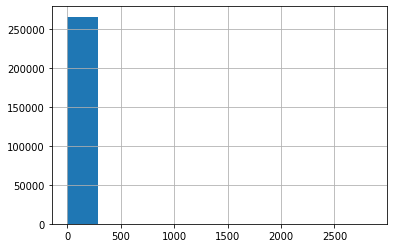

In [24]:
df["EUR_agg_agg"].hist()

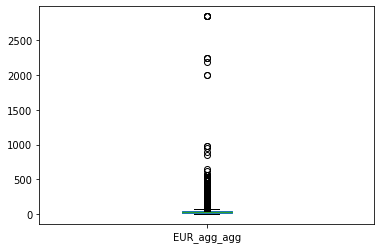

In [25]:
df["EUR_agg_agg"].plot.box()

In [26]:
df.loc[(df["EUR_agg_agg"]< 500 )]["EUR_agg_agg"].mean()

30.79342167543537

In [27]:
df.loc[(df["EUR_agg_agg"]< 500 )]["EUR_agg_agg"].std()

27.26491527441346

In [28]:
year_prizes_df = df.groupby("year_publication")

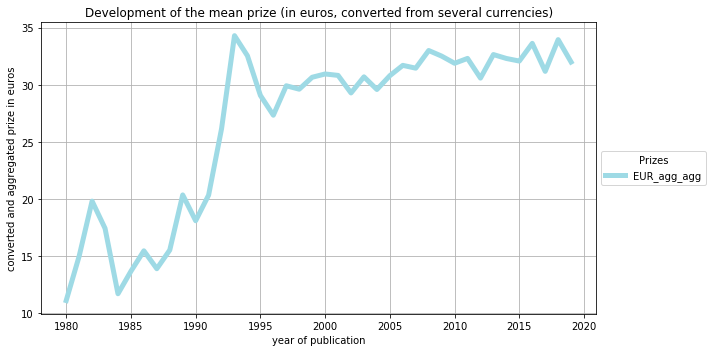

In [29]:
visualize.plot_lines(year_prizes_df["EUR_agg_agg"].mean(), xlabel = "year of publication", ylabel ="converted and aggregated prize in euros",
title = "Development of the mean prize (in euros, converted from several currencies)", title_legend="Prizes", figure_name = "line_development_prizes_mean"
)

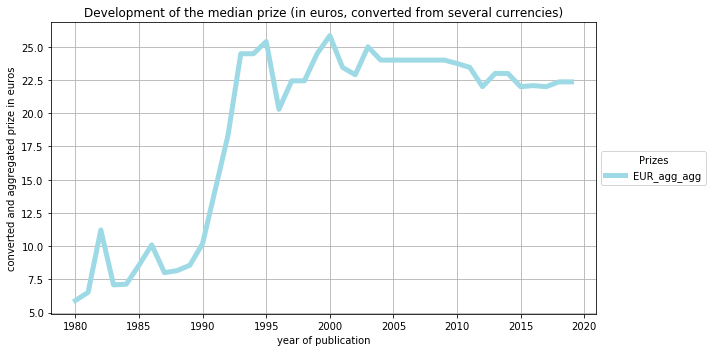

In [30]:
visualize.plot_lines(year_prizes_df["EUR_agg_agg"].median(), xlabel = "year of publication", ylabel ="converted and aggregated prize in euros",
title = "Development of the median prize (in euros, converted from several currencies)", title_legend="Prizes", figure_name = "line_development_prizes_median"
)

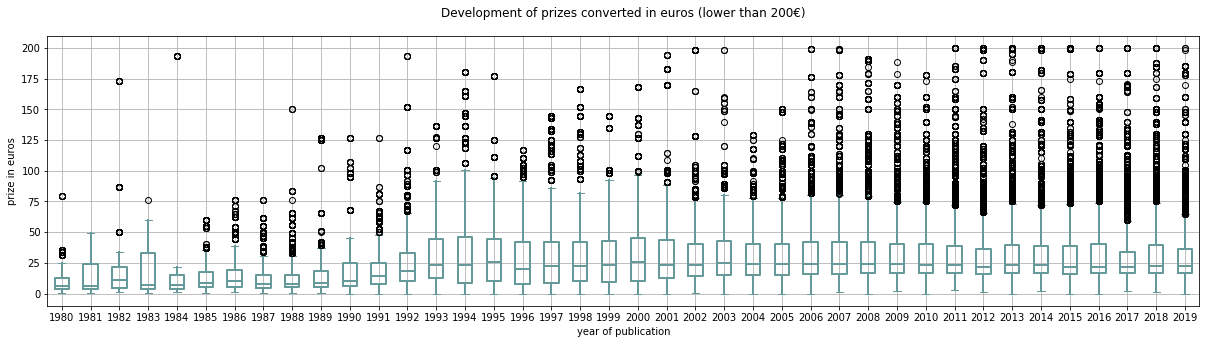

In [31]:
visualize.plot_boxplots_by(df.loc[(df["EUR_agg_agg"]< 200 )], "EUR_agg_agg", "year_publication",
xlabel = "year of publication", ylabel = "prize in euros", title ="Development of prizes converted in euros (lower than 200€)", figure_name = "boxplots_prize_development")

#df.loc[df["medium_first"].isin(["A"]) & (df["EUR_agg_agg"]< 500 )].boxplot("EUR_agg_agg", by="year_publication", figsize=(20,5))


In [32]:
year_prizes_df[["EUR_agg_agg"]].median().head(5)

EUR_agg_agg
year_publication             
1980                   5.9075
1981                   6.5280
1982                  11.2200
1983                   7.0890
1984                   7.1400

In [33]:
year_prizes_median_df = year_prizes_df[["EUR_agg_agg"]].median()


In [34]:
year_prizes_median_df["year_publication"] = year_prizes_median_df.index

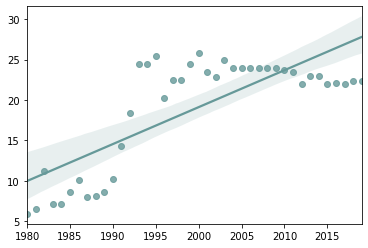

In [35]:
visualize.plot_scatter_w_regression_line(year_prizes_median_df, "year_publication", "EUR_agg_agg")

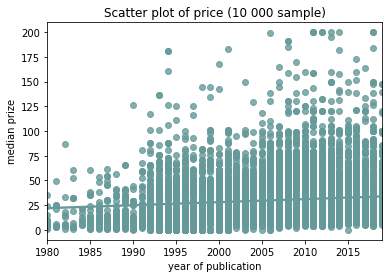

In [63]:
visualize.plot_scatter_w_regression_line(df.loc[(df["EUR_agg_agg"]< 200 )].sample(10000), "year_publication", "EUR_agg_agg",
xlabel = "year of publication", ylabel = "median prize", figure_name = "scatter_price", title = "Scatter plot of price (10 000 sample)")

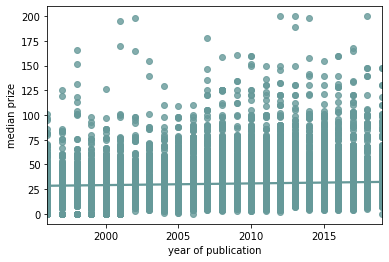

In [37]:
visualize.plot_scatter_w_regression_line(df.loc[(df["EUR_agg_agg"]< 200 ) & (df["year_publication"] > 1995 )].sample(10000), "year_publication", "EUR_agg_agg",
xlabel = "year of publication", ylabel = "median prize")

In [61]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(df.loc[(df["EUR_agg_agg"]< 200 ) & (df["year_publication"] > 1995 )]["year_publication"], df.loc[(df["EUR_agg_agg"]< 200 ) & (df["year_publication"] > 1995 )]["EUR_agg_agg"] )

In [62]:
print(pvalue, slope)

6.697658020409365e-98 0.16965293299094159


In [38]:
results_regression_euros_df = statistical_tests.calculate_regression_line(year_prizes_median_df.loc[year_prizes_median_df["year_publication"] > 1995][["EUR_agg_agg"]])

In [39]:
results_regression_euros_df

column     slope   intercept    rvalue    pvalue    stderr
column                                                                      
EUR_agg_agg  EUR_agg_agg -0.042563  108.646968 -0.251864  0.235123  0.034868

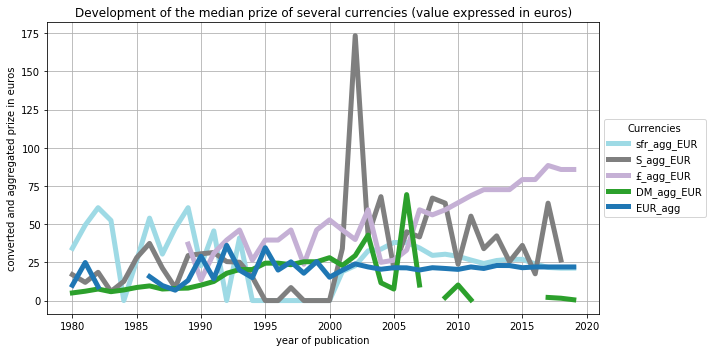

In [40]:
visualize.plot_lines(year_prizes_df[["sfr_agg_EUR", "S_agg_EUR", "£_agg_EUR", "DM_agg_EUR", "EUR_agg"]].median(),
xlabel = "year of publication", ylabel ="converted and aggregated prize in euros",
title = "Development of the median prize of several currencies (value expressed in euros)", title_legend="Currencies", figure_name = "line_development_prizes_median"
)

In [41]:
year_prizes_df[["sfr_agg_EUR", "S_agg_EUR", "£_agg_EUR", "DM_agg_EUR", "EUR_agg"]].median()


sfr_agg_EUR  S_agg_EUR  £_agg_EUR  DM_agg_EUR  EUR_agg
year_publication                                                        
1980                   34.200    16.9575    79.2000       4.998   10.000
1981                   49.400    11.9000        NaN       6.120   24.900
1982                   60.800    18.4875    26.4000       7.548    9.000
1983                   52.440     5.9500        NaN       5.814      NaN
1984                    0.000    12.5375     6.5340       6.936   10.945
1985                   26.220    28.0500        NaN       8.568      NaN
1986                   53.960    37.4000    22.4268       9.588   15.700
1987                   30.400    21.2500        NaN       7.548    9.800
1988                   47.386     8.4575        NaN       7.956    6.800
1989                   60.800    29.4525    36.9600       8.160   13.200
1990                   22.800    30.6000    13.5300      10.098   29.000
1991                   45.600    31.4500    31.0134      12.495   14.200
1992                    0.000    25.5000    39.6000      17.850   36.150
1993                   41.040    25.0750    46.2000      20.298   19.900
1994                    0.000    15.3000    26.4000      20.298   15.000
1995                    0.000     0.0000    39.6000      24.480   34.600
1996                    0.000     0.0000    39.6000      24.480   19.950
1997                    0.000     8.5000    46.2000      23.460   25.340
1998                    0.000     0.0000    23.7600      25.398   17.900
1999                    0.000     0.0000    46.2000      25.398   25.500
2000                    0.000     0.0000    52.8000      28.050   15.290
2001                   19.000    34.0000    46.2000      22.950   19.850
2002                   22.800   173.4000    39.9432      29.427   24.000
2003                   32.528    42.5000    59.4000      42.840   22.000
2004                   33.630    68.0000    25.0140      11.628   20.500
2005                   38.000    21.2500    26.4000       7.548   21.500
2006                   38.000    45.0075    33.0000      69.360   21.400
2007                   34.428    41.6500    59.4000      10.149   20.000
2008                   29.564    67.1075    56.1000         NaN   21.500
2009                   30.324    63.7500    59.4000       2.040   21.000
2010                   28.956    23.8000    64.0200      10.200   20.400
2011                   26.524    55.2500    68.6400       0.510   22.000
2012                   24.244    33.9575    72.6000         NaN   21.000
2013                   26.220    42.3300    72.6000         NaN   22.950
2014                   26.980    25.5000    72.6000         NaN   22.900
2015                   26.980    36.0995    79.2000         NaN   21.500
2016                   23.940    17.5100    79.2000         NaN   22.000
2017                   21.660    63.7500    88.4268       2.040   21.990
2018                   21.204    26.5625    85.8000       1.530   22.000
2019                   21.242        NaN    85.8000       0.510   22.000

In [42]:
results_regression_currencies_df = statistical_tests.calculate_regression_line(year_prizes_df[["sfr_agg_EUR", "S_agg_EUR", "£_agg_EUR", "DM_agg_EUR", "EUR_agg"]].median())

In [43]:
results_regression_currencies_df

column     slope    intercept    rvalue    pvalue    stderr
column                                                                       
£_agg_EUR      £_agg_EUR  1.478670 -2909.701102  0.717566  0.000001  0.249843
S_agg_EUR      S_agg_EUR  0.886516 -1741.162812  0.334771  0.037237  0.410230
EUR_agg          EUR_agg  0.203275  -386.516827  0.372390  0.021314  0.084434
DM_agg_EUR    DM_agg_EUR  0.093096  -170.738379  0.073689  0.678749  0.222724
sfr_agg_EUR  sfr_agg_EUR -0.336343   698.799132 -0.221146  0.170268  0.240616

In [44]:
results_regression_currencies_df = statistical_tests.calculate_regression_line(year_prizes_df[["sfr_agg_EUR", "S_agg_EUR", "£_agg_EUR", "DM_agg_EUR", "EUR_agg"]].median().iloc[20:,:])

In [68]:
results_regression_currencies_df.round(2)

column  slope  intercept  rvalue  pvalue  stderr
column                                                            
£_agg_EUR      £_agg_EUR   2.77   -5502.03    0.84    0.00    0.41
EUR_agg          EUR_agg   0.13    -241.97    0.45    0.05    0.06
sfr_agg_EUR  sfr_agg_EUR  -0.00      32.17   -0.00    0.99    0.33
S_agg_EUR      S_agg_EUR  -1.46    2971.80   -0.23    0.35    1.50
DM_agg_EUR    DM_agg_EUR  -1.79    3610.59   -0.57    0.03    0.75

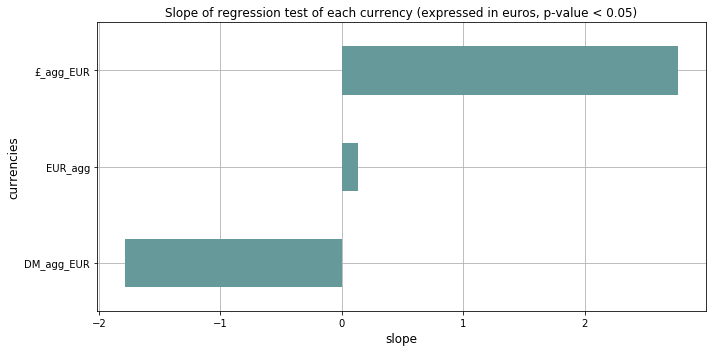

In [48]:
visualize.plot_bars(results_regression_currencies_df.loc[results_regression_currencies_df["pvalue"] < 0.05][["slope"]].head(20).T, title ="Slope of regression test of each currency (expressed in euros, p-value < 0.05)", xlabel ="slope", ylabel = "currencies", figure_name = "bar_slop_currencies", figsize=(10,5))

# Compare e-book and print prizes

In [49]:
df["medium_first"].replace({"O": "E-Book", "A": "Print"}, inplace=True)

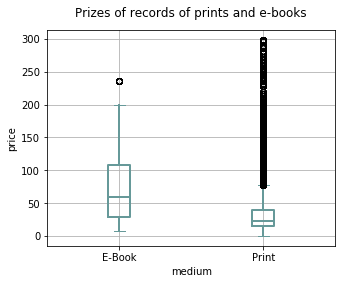

In [50]:
visualize.plot_boxplots_by(df.loc[df["medium_first"].isin(["E-Book","Print"]) & (df["EUR_agg_agg"]< 300 )],
column_to_plot = "EUR_agg_agg", column_by = "medium_first", figsize = (5,4), xlabel = "medium", ylabel = "price",
title = "Prizes of records of prints and e-books", figure_name = "boxplot_prices_print_ebooks")

In [51]:
df.loc[df["medium_first"].isin(["E-Book"]) & (df["EUR_agg_agg"]< 500 )]["EUR_agg_agg"].dropna().median()

59.400000000000006

In [52]:
df.loc[df["medium_first"].isin(["Print"]) & (df["EUR_agg_agg"]< 500 )]["EUR_agg_agg"].dropna().median()

22.832

In [53]:
statistic, pvalue = stats.ttest_ind(
                            df.loc[df["medium_first"].isin(["E-Book"])]["EUR_agg_agg"].dropna(),
                            df.loc[df["medium_first"].isin(["Print"])]["EUR_agg_agg"].dropna(),
                    equal_var = False
                            )

In [54]:
pvalue

6.377504357818714e-11

In [55]:
df.loc[df["medium_first"].isin(["Print"])]["EUR_agg_agg"].dropna().shape


(261295,)

In [56]:
df.loc[df["medium_first"].isin(["E-Book"])]["EUR_agg_agg"].dropna().shape

(345,)

In [57]:
statistic, pvalue = stats.ttest_ind(
                            df.loc[df["medium_first"].isin(["E-Book"])]["EUR_agg_agg"].dropna(),
                            df.loc[df["medium_first"].isin(["Print"])]["EUR_agg_agg"].sample(345).dropna(),
                    equal_var = False
                            )
pvalue



6.698058348428435e-11

In [58]:
statistic, pvalue = stats.ttest_ind(
                            df.loc[df["medium_first"].isin(["E-Book"])]["EUR_agg_agg"].dropna(),
                            df.loc[df["medium_first"].isin(["Print"])]["EUR_agg_agg"].sample(345).dropna(),
                    equal_var = False
                            )
pvalue


1.6279999790108154e-10

In [59]:
statistic, pvalue = stats.ttest_ind(
                            df.loc[df["medium_first"].isin(["E-Book"])]["EUR_agg_agg"].dropna(),
                            df.loc[df["medium_first"].isin(["Print"])]["EUR_agg_agg"].sample(345).dropna(),
                    equal_var = False
                            )
pvalue

2.8835774385426452e-11